In [3]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





In [4]:
#Loading the dataset
df = pd.read_csv("C:\\Users\\Shivanjali\\Downloads\\usedCars.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1064 non-null   int64  
 1   Company           1064 non-null   object 
 2   Model             1064 non-null   object 
 3   Variant           1064 non-null   object 
 4   FuelType          1063 non-null   object 
 5   Colour            1064 non-null   object 
 6   Kilometer         1064 non-null   int64  
 7   BodyStyle         1064 non-null   object 
 8   TransmissionType  350 non-null    object 
 9   ManufactureDate   1064 non-null   object 
 10  ModelYear         1064 non-null   int64  
 11  CngKit            22 non-null     object 
 12  Price             1064 non-null   object 
 13  Owner             1064 non-null   object 
 14  DealerState       1064 non-null   object 
 15  DealerName        1064 non-null   object 
 16  City              1064 non-null   object 


,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


In [5]:
df.shape

(1064, 19)

In [6]:
df.columns

Index(['Id', 'Company', 'Model', 'Variant', 'FuelType', 'Colour', 'Kilometer',
       'BodyStyle', 'TransmissionType', 'ManufactureDate', 'ModelYear',
       'CngKit', 'Price', 'Owner', 'DealerState', 'DealerName', 'City',
       'Warranty', 'QualityScore'],
      dtype='object')

In [7]:
df.dtypes

Id                    int64
Company              object
Model                object
Variant              object
FuelType             object
Colour               object
Kilometer             int64
BodyStyle            object
TransmissionType     object
ManufactureDate      object
ModelYear             int64
CngKit               object
Price                object
Owner                object
DealerState          object
DealerName           object
City                 object
Warranty              int64
QualityScore        float64
dtype: object

In [8]:
def convert_amount(amount_str):
    if "Lakhs" in amount_str:
        return float(amount_str.replace(' Lakhs', '').replace(',', '')) * 100000
    else:
        return float(amount_str.replace(',', ''))

df['Price'] = df['Price'].apply(convert_amount)

In [9]:
df.isnull().sum()/df.shape[0]*100

Id                   0.000000
Company              0.000000
Model                0.000000
Variant              0.000000
FuelType             0.093985
Colour               0.000000
Kilometer            0.000000
BodyStyle            0.000000
TransmissionType    67.105263
ManufactureDate      0.000000
ModelYear            0.000000
CngKit              97.932331
Price                0.000000
Owner                0.000000
DealerState          0.000000
DealerName           0.000000
City                 0.000000
Warranty             0.000000
QualityScore         0.000000
dtype: float64

In [17]:
df.drop('CngKit', axis=1, inplace=True)


In [19]:
df.drop('TransmissionType',axis=1,inplace=True)

In [21]:
df['FuelType'].dropna(inplace=True)

In [23]:
df.drop('ManufactureDate', axis = 1, inplace=True)

In [25]:
df.drop('Variant', axis = 1, inplace=True)

In [27]:
df['ModelYear'] = 2024 - df['ModelYear']
df.rename(columns={'ModelYear':'Age'},inplace=True)

In [29]:
for i in df.columns:
    print(i,df[i].nunique())

Id 1064
Company 23
Model 218
FuelType 5
Colour 76
Kilometer 1006
BodyStyle 10
Age 17
Price 362
Owner 4
DealerState 10
DealerName 57
City 11
Warranty 2
QualityScore 43


In [31]:
df.describe()

,Id,Kilometer,Age,Price,Warranty,QualityScore
count,1064.000000,1064.000000,1064.000000,1.064000e+03,1064.000000,1064.000000
mean,568156.542293,52807.187970,7.135338,8.350536e+05,0.738722,7.770207
std,16438.139974,33840.296979,2.996786,5.726538e+05,0.439538,0.719717
min,525978.000000,101.000000,1.000000,9.500000e+04,0.000000,0.000000
25%,555321.500000,32113.500000,5.000000,4.850000e+05,0.000000,7.500000
50%,572753.000000,49432.000000,7.000000,6.750000e+05,1.000000,7.800000
75%,583072.750000,68828.500000,9.000000,9.850000e+05,1.000000,8.100000
max,589122.000000,640000.000000,21.000000,8.500000e+06,1.000000,9.400000


In [33]:
df.head()

,Id,Company,Model,FuelType,Colour,Kilometer,BodyStyle,Age,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),PETROL,Silver,33197,HATCHBACK,6,575000.0,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,PETROL,Red,10322,HATCHBACK,3,435000.0,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,PETROL,Grey,37889,HATCHBACK,9,470000.0,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,PETROL,A Blue,13106,HATCHBACK,4,990000.0,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,DIESEL,Silver,104614,HATCHBACK,14,270000.0,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


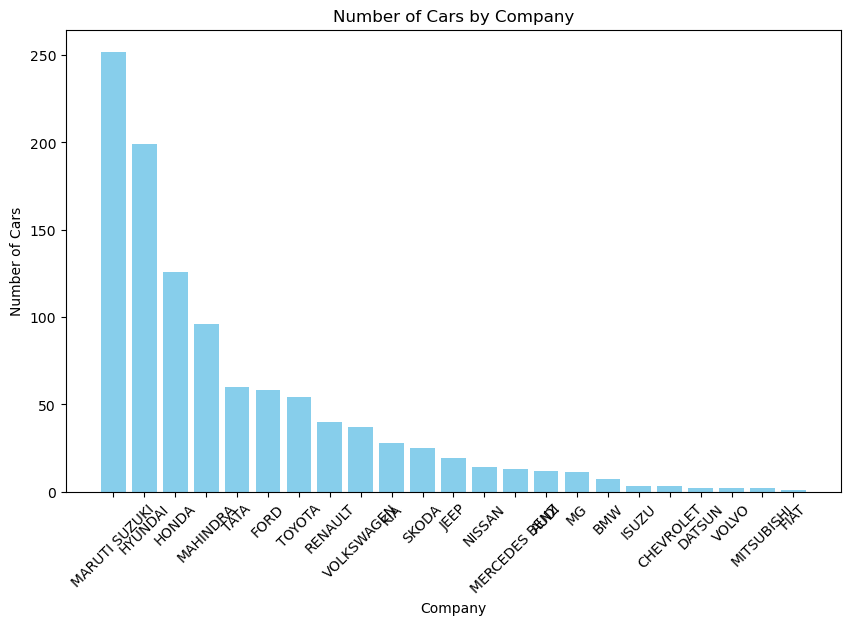

In [35]:
company_counts = df['Company'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(company_counts.index, company_counts.values, color='skyblue')
plt.xlabel('Company')
plt.ylabel('Number of Cars')
plt.title('Number of Cars by Company')
plt.xticks(rotation=45)  # Rotate x labels if they overlap
plt.show()


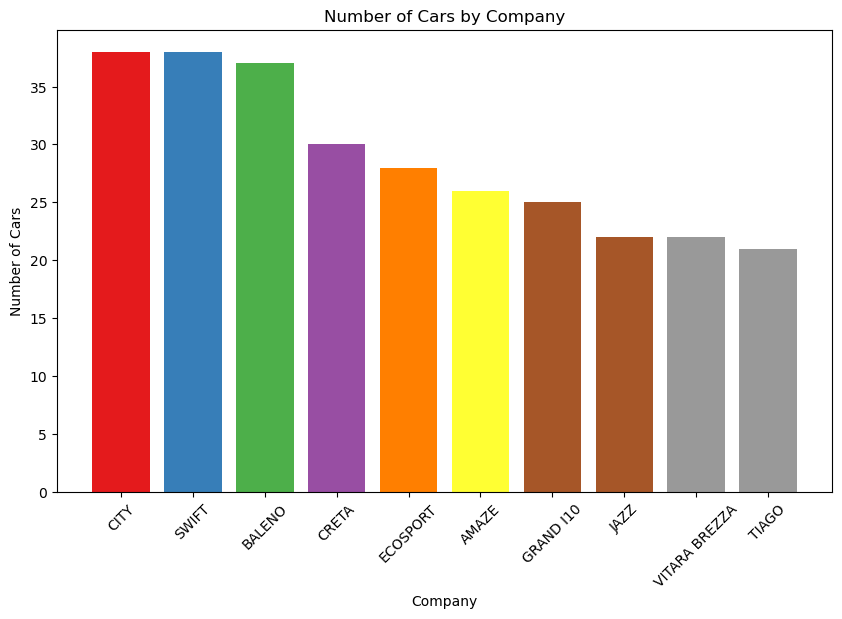

In [36]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
# Count the number of cars by company
company_counts = df['Model'].value_counts().iloc[:10]
colors = cm.Set1(np.linspace(0, 1, len(company_counts)))

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(company_counts.index, company_counts.values, color=colors)
plt.xlabel('Company')
plt.ylabel('Number of Cars')
plt.title('Number of Cars by Company')
plt.xticks(rotation=45)  # Rotate x labels if they overlap
plt.show()


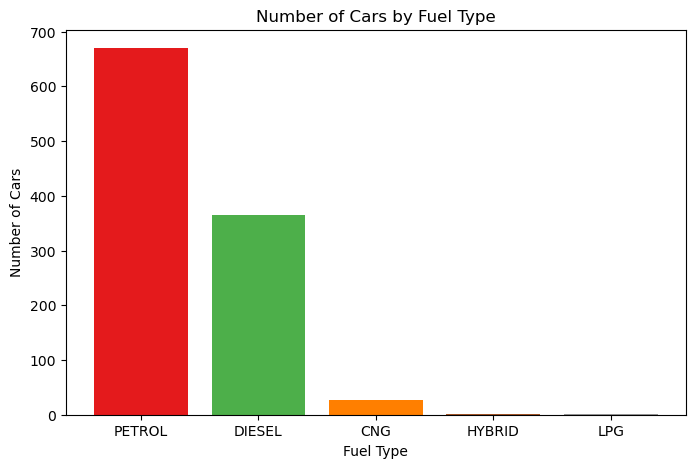

In [39]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Count the number of cars by fuel type
fuel_counts = df['FuelType'].value_counts()

# Define a color palette
colors = cm.Set1(np.linspace(0, 1, len(fuel_counts)))

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(fuel_counts.index, fuel_counts.values, color=colors)
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.title('Number of Cars by Fuel Type')
plt.show()


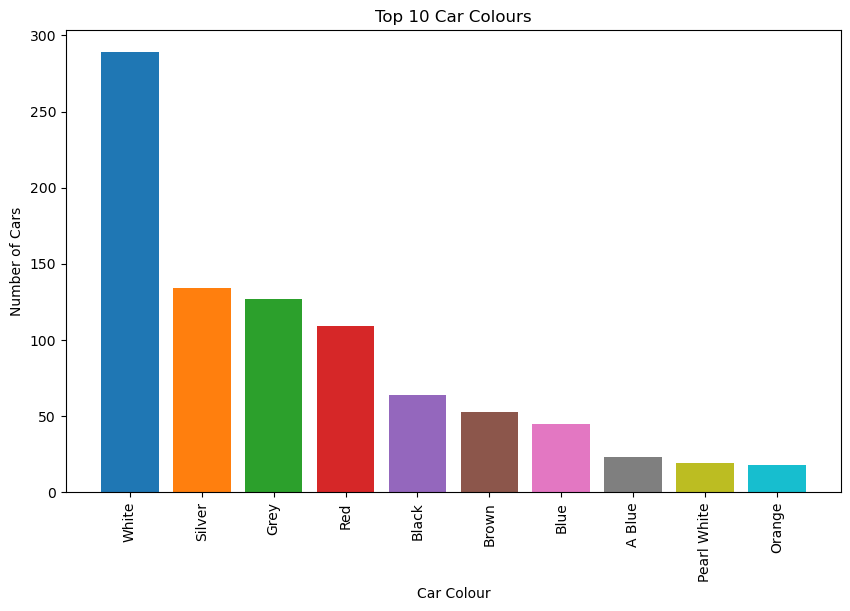

In [41]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Get the top 10 car colors
top_colors = df['Colour'].value_counts().iloc[:10]

# Define color palette using a colormap (e.g., 'tab10' colormap for 10 colors)
colors = cm.tab10(np.linspace(0, 1, len(top_colors)))

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_colors.index, top_colors.values, color=colors)
plt.xlabel('Car Colour')
plt.ylabel('Number of Cars')
plt.title('Top 10 Car Colours')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()


Text(0.5, 1.0, 'Odometer Reading')

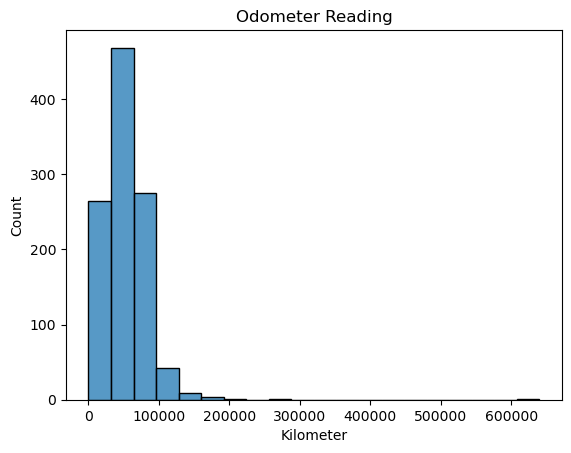

In [43]:
sns.histplot(x = 'Kilometer', data = df, bins = 20).set_title('Odometer Reading')

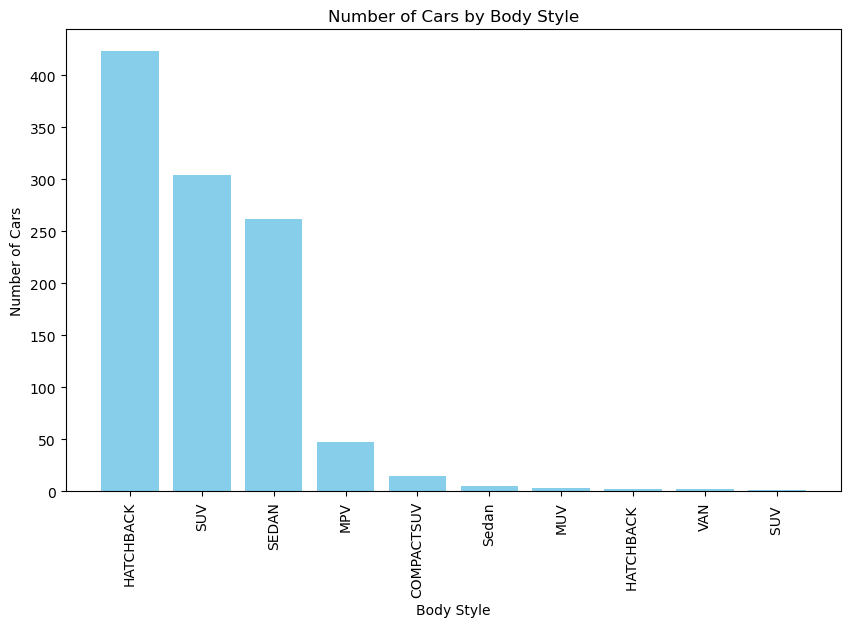

In [45]:
import matplotlib.pyplot as plt

# Count the number of cars by BodyStyle
body_style_counts = df['BodyStyle'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(body_style_counts.index, body_style_counts.values, color='skyblue')  # Use a color of your choice
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.title('Number of Cars by Body Style')
plt.xticks(rotation=90)  # Rotate x labels for readability
plt.show()


Text(0.5, 1.0, 'Car age distribution')

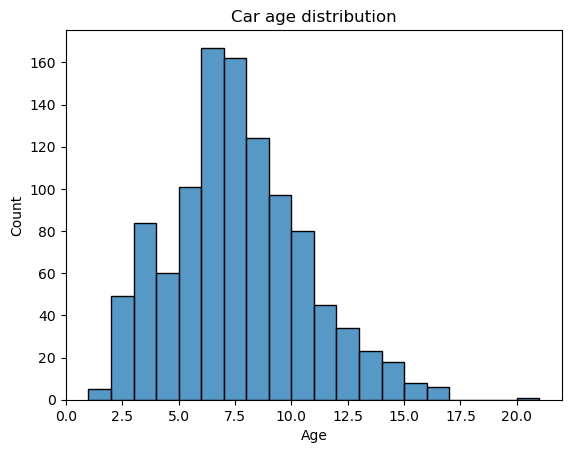

In [47]:
sns.histplot(x = 'Age', data = df, bins = 20).set_title('Car age distribution')

Text(0.5, 1.0, 'Car price distribution')

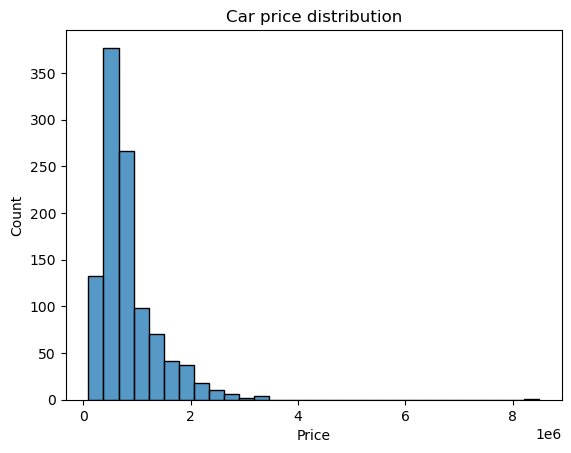

In [49]:
sns.histplot(x = 'Price', data =df, bins = 30).set_title('Car price distribution')

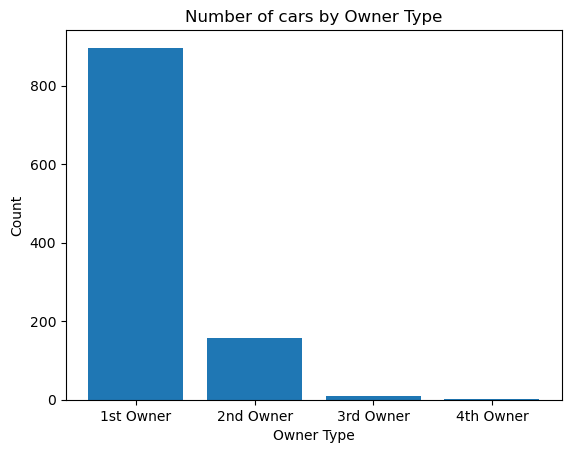

In [51]:
import matplotlib.pyplot as plt

# Calculate the count of each 'Owner' category
owner_counts = df['Owner'].value_counts()

# Create a bar chart
plt.bar(owner_counts.index, owner_counts.values)

# Set title and labels
plt.title('Number of cars by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Count')

# Show the plot
plt.show()


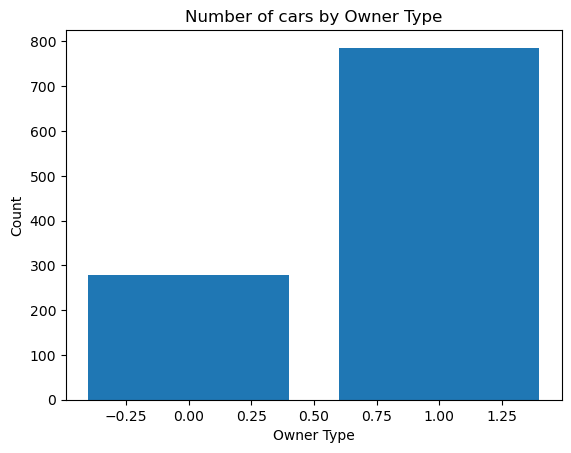

In [53]:
import matplotlib.pyplot as plt

# Calculate the count of each 'Owner' category
owner_counts = df['Warranty'].value_counts()

# Create a bar chart
plt.bar(owner_counts.index, owner_counts.values)

# Set title and labels
plt.title('Number of cars by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Count')

# Show the plot
plt.show()


Text(0.5, 1.0, 'Quality Score Distribution')

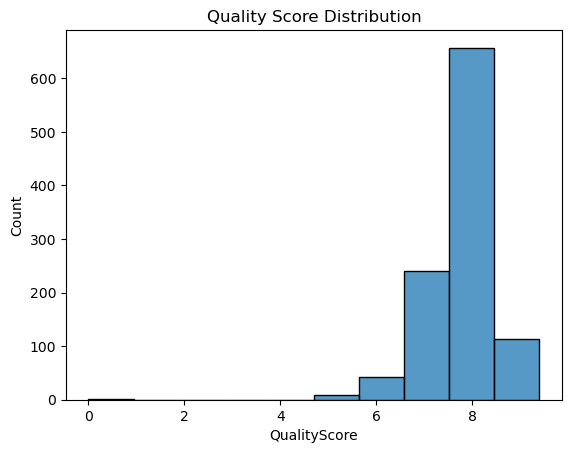

In [55]:
sns.histplot(x = 'QualityScore', data = df, bins = 10).set_title('Quality Score Distribution')

Text(0.5, 1.0, 'Price by Fuel Type')

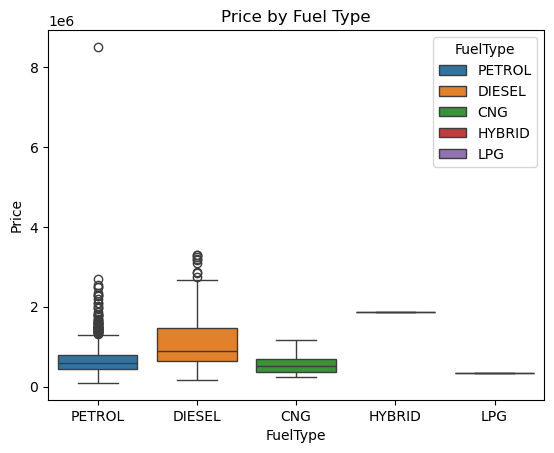

In [57]:
sns.boxplot(x = 'FuelType', y = 'Price', data = df,  hue = 'FuelType').set_title('Price by Fuel Type')

Text(0.5, 1.0, 'Odometer Reading and Price')

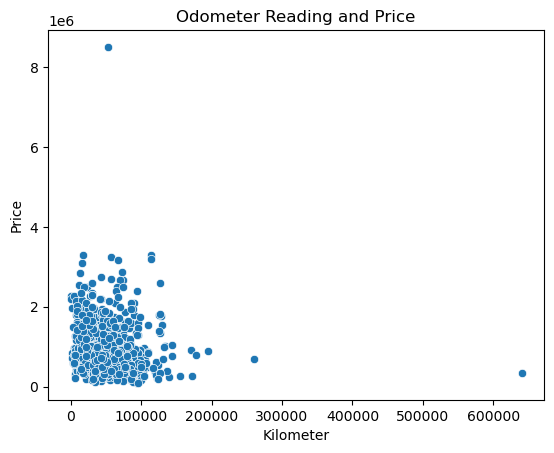

In [59]:
sns.scatterplot(x = 'Kilometer', y = 'Price', data = df).set_title('Odometer Reading and Price')

Text(0.5, 1.0, 'Quality Score and Price')

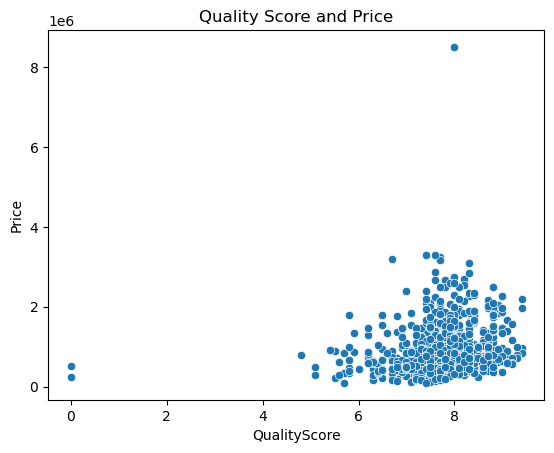

In [61]:
sns.scatterplot(x = 'QualityScore', y = 'Price', data = df).set_title('Quality Score and Price')

In [63]:
df.drop('Model', axis = 1, inplace = True)

In [65]:
cols = df.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder
#Label encoding object
le = LabelEncoder()

#label encoding for object type columns
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Company [12  7 19  5 13 21 11  6 17 16  9  4 20 10  1  3 18 14  0  8 22 15  2]
FuelType [4 1 0 2 5 3]
Colour [61 56 34  0  9 11 66 47 49 38 14 71 72 30 74 52 39 28 60  7 54 62 40 13
 20 70 63 12 24 23 35 26 29 15 31  1 68  4  8 73 22 44 57 65 42 50 32 64
 19 43 46 33 16 27 53 25 10 69 51 17  6 48 59 58  5  3 18 45 67 36 21 55
  2 37 75 41]
BodyStyle [1 5 3 6 2 9 4 0 8 7]
Owner [0 1 2 3]
DealerState [2 4 0 1 8 7 3 6 9 5]
DealerName [52 38  4  1 56 29  0 34 47 51 11 21  9 10 43 33  7 16  5 12 42 17 27 50
 45  6 20 36 23 41 32 31 18  2 48 15 54 40 55 13 49 25 35 46 24 14 44 19
 39 28 26  3 53 30  8 22 37]
City [ 0 10  2  3  9  4  5  8  1  7  6]


In [67]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Select columns with numerical data (int64 or float64)
cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate Z-scores for each numerical column
z_scores = np.abs(zscore(df[cols]))

# Define the threshold for outliers (e.g., 3)
threshold = 3

# Filter out the rows where any Z-score is greater than the threshold
df_cleaned = df[(z_scores < threshold).all(axis=1)]
print(df_cleaned)

# Optionally, print the number of rows removed (if any)
print(f"Number of rows before removing outliers: {df.shape[0]}")
print(f"Number of rows after removing outliers: {df_cleaned.shape[0]}")

# The cleaned DataFrame is now in df_cleaned


          Id  Company  FuelType  Colour  Kilometer  BodyStyle  Age     Price  \
0     555675       12         4      61      33197          1    6  575000.0   
1     556383       12         4      56      10322          1    3  435000.0   
2     556422        7         4      34      37889          1    9  470000.0   
3     556771       19         4       0      13106          1    4  990000.0   
4     559619        5         1      61     104614          1   14  270000.0   
...      ...      ...       ...     ...        ...        ...  ...       ...   
1059  588906        7         4      71      42918          1    4  715000.0   
1060  588945        7         4      71      78910          5    5  500000.0   
1061  588946       11         1      71      76000          6   11  575000.0   
1062  588949       12         1      61      80120          1    6  771000.0   
1063  588950        6         1      68      77500          5   10  499000.0   

      Owner  DealerState  DealerName  C

<Axes: >

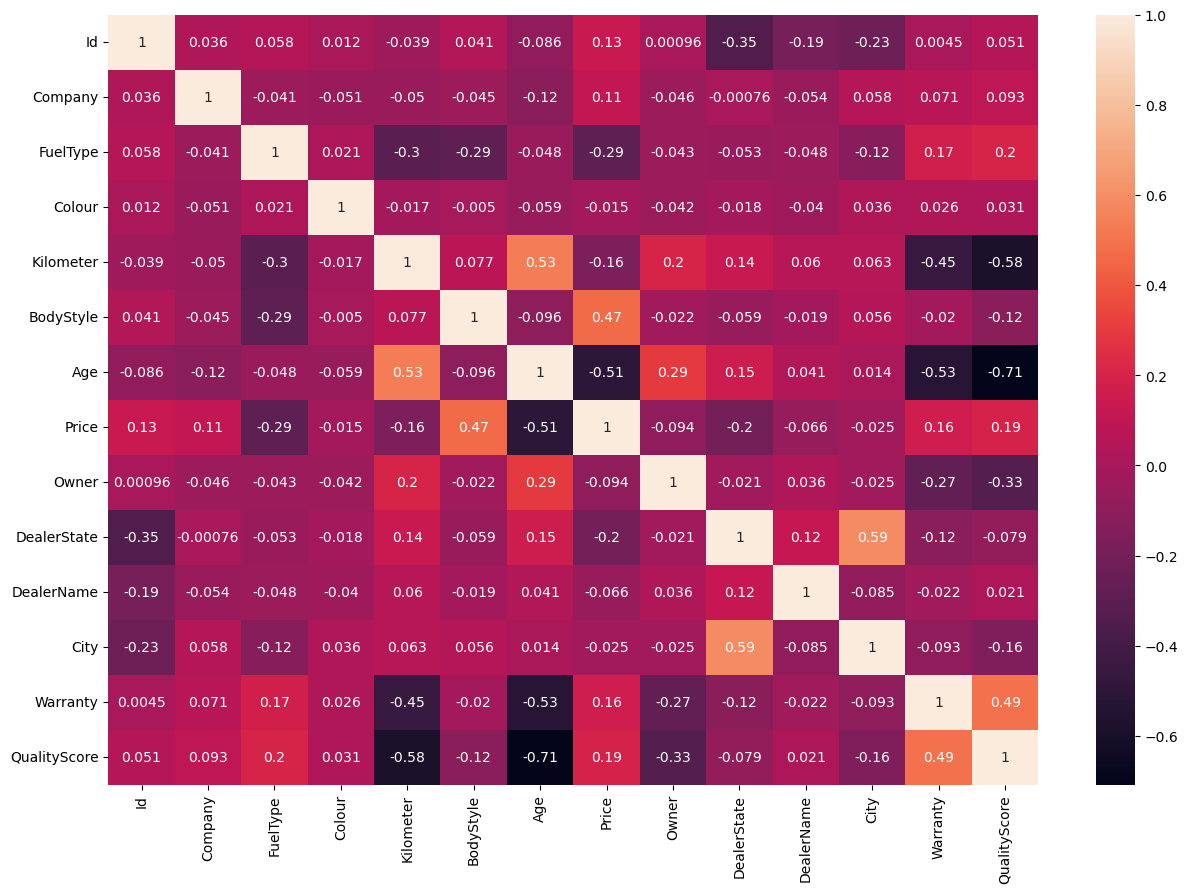

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(df_cleaned.corr(), annot=True)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop('Price',axis=1), 
                                                    df_cleaned['Price'], test_size=0.2,
                                                    random_state=42)

Mean Absolute Error: 267041.38
Mean Squared Error: 139734551886.73
R-squared: 0.48


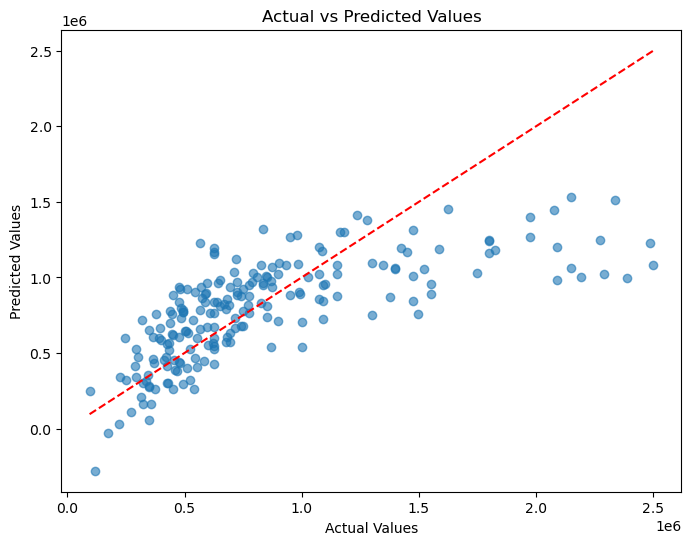

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = df_cleaned.drop(columns=['Price'])
y = df_cleaned['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
# Predictions
y_pred = lin_reg.predict(X_test)
# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_linear = r2
# Print the evaluation metrics
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red',
         linestyle='--')  # Line for perfect predictions
plt.show()


Mean Squared Error: 134604246810.67
Mean Absolute Error: 234546.83
R-squared: 0.50


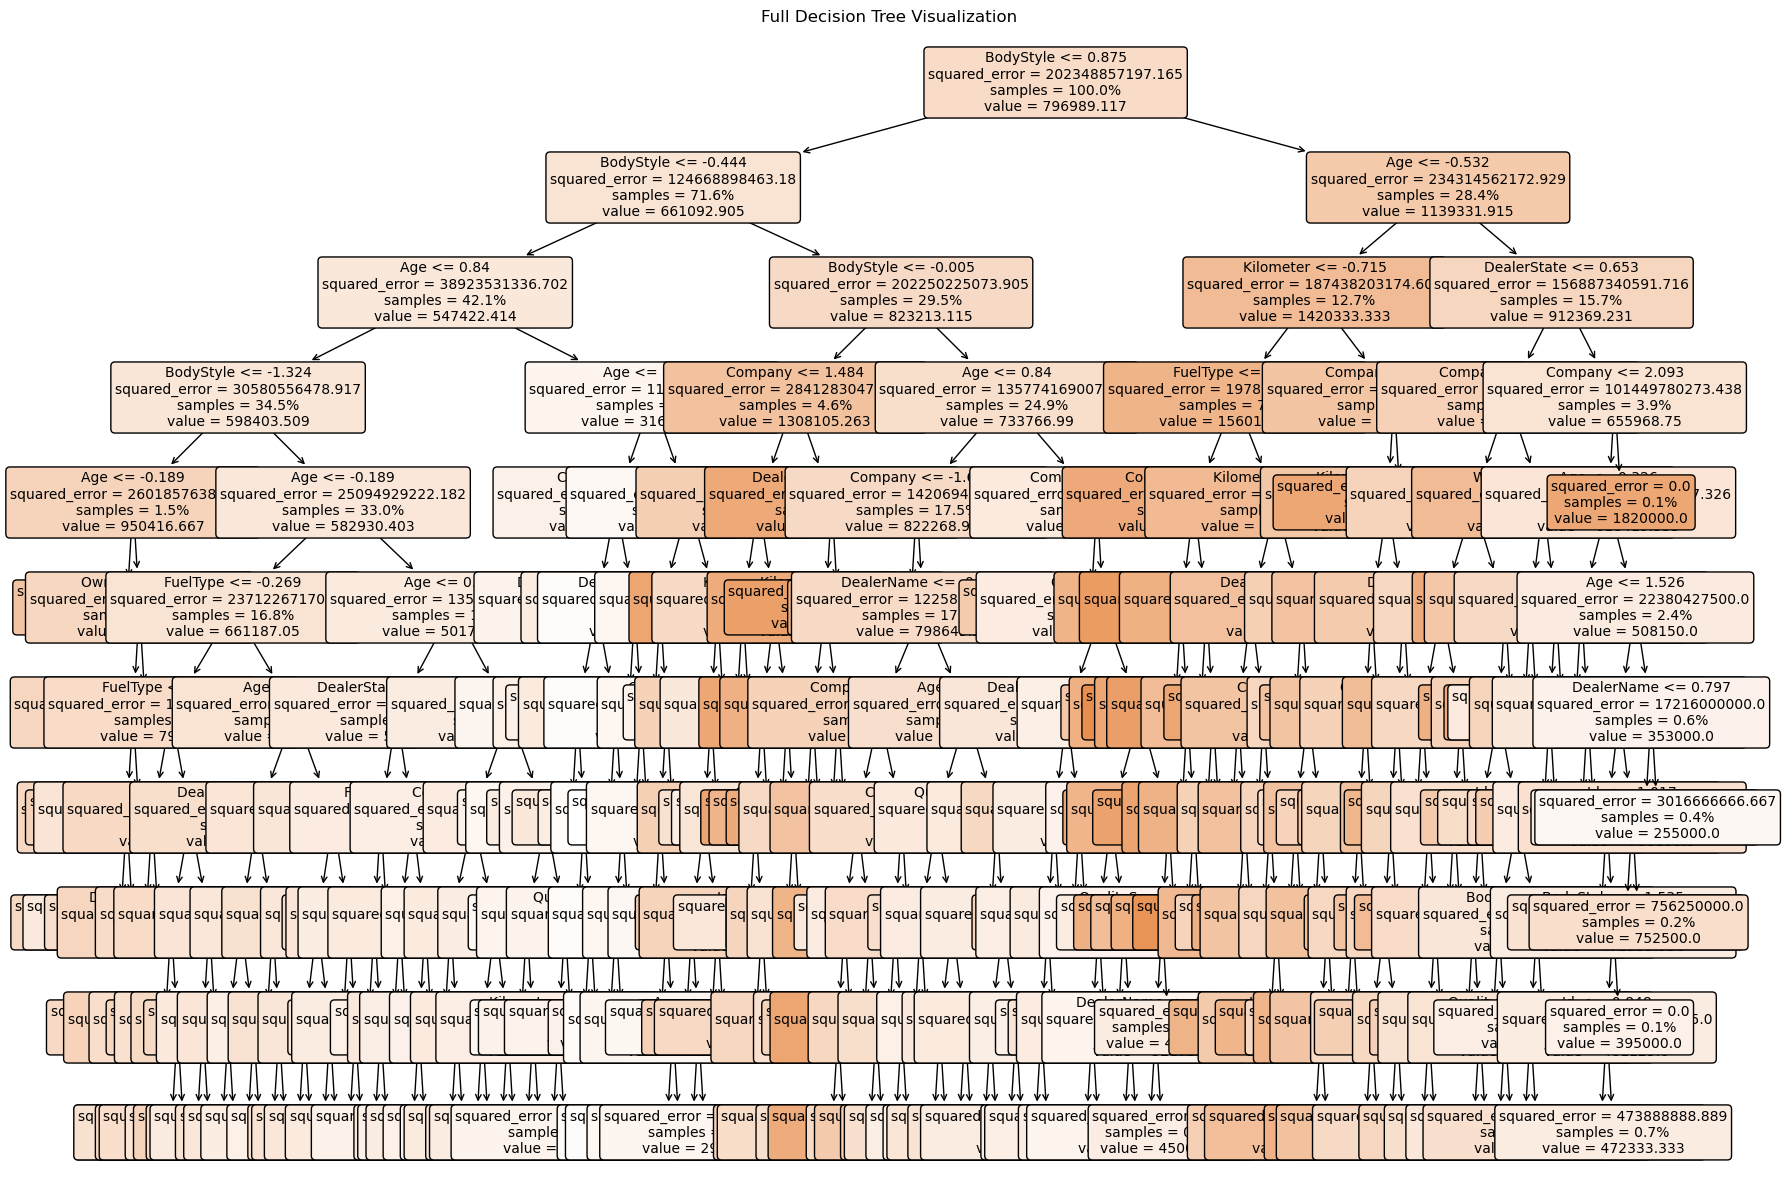

In [109]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
dt_regressor = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=1,
                                     random_state=42)

dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_tree=r2

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

plt.figure(figsize=(20, 15))  
plot_tree(dt_regressor, 
          filled=True, 
          feature_names=X.columns, 
          rounded=True, 
          proportion=True, 
          fontsize=10)  
plt.title("Full Decision Tree Visualization")
plt.show()


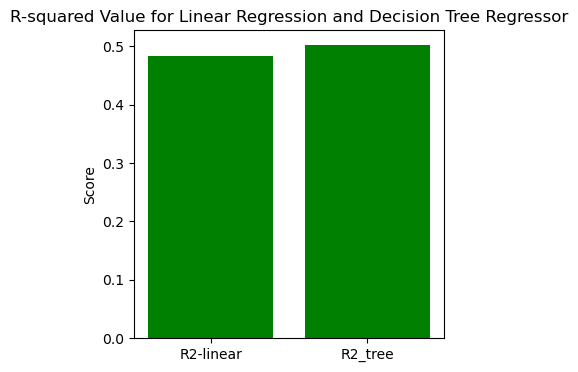

In [121]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.bar(['R2-linear','R2_tree'], [r2_linear,r2_tree], color='green')
plt.ylabel('Score')
plt.title('R-squared Value for Linear Regression and Decision Tree Regressor')
plt.show()